In [1]:
import sys, os
sys.path.append('../../../GillesPy2')
import matplotlib.pyplot as plt
import numpy as np
import gillespy2
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

In [2]:
# Oregonator system
# http://www.scholarpedia.org/article/Oregonator
class Oregonator(gillespy2.Model):

     def __init__(self, parameter_values = None):

          # Superclass initialization
          gillespy2.Model.__init__(self, name = "Oregonator")
          
          # Species
          F = gillespy2.Species(name = "F", initial_value = 2)
          A = gillespy2.Species(name = "A", initial_value = 250)
          B = gillespy2.Species(name = "B", initial_value = 500)
          C = gillespy2.Species(name = "C", initial_value = 1000)
          P = gillespy2.Species(name = "P", initial_value = 0)
          self.add_species([F, A, B, C, P])

          # Parameters (rates)
          k1 = gillespy2.Parameter(name = "k1", expression = 2.0)
          k2 = gillespy2.Parameter(name = "k2", expression = 0.1)
          k3 = gillespy2.Parameter(name = "k3", expression = 104)
          k4 = gillespy2.Parameter(name = "k4", expression = 4e-7)
          k5 = gillespy2.Parameter(name = "k5", expression = 26.0)
          self.add_parameter([k1, k2, k3, k4, k5])
          
          # Reactions
          reaction1 = gillespy2.Reaction(name = "reaction1", 
                                         reactants = {B: 1, F: 1}, 
                                         products = {A: 1, F: 1}, 
                                         rate = k1)
          reaction2 = gillespy2.Reaction(name = "reaction2", 
                                         reactants = {A: 1, B: 1}, 
                                         products = {P: 1}, 
                                         rate = k2)
          reaction3 = gillespy2.Reaction(name = "reaction3", 
                                         reactants = {A: 1, F: 1}, 
                                         products = {A: 2, C: 1, F: 1}, 
                                         rate = k3)
          reaction4 = gillespy2.Reaction(name = "reaction4", 
                                         reactants = {A: 2}, 
                                         products = {P: 1}, 
                                         rate = k4)
          reaction5 = gillespy2.Reaction(name = "reaction5", 
                                         reactants = {C: 1, F: 1}, 
                                         products = {B: 1, F: 1}, 
                                         rate = k5)
          self.add_reaction([reaction1, reaction2, reaction3, reaction4, reaction5])
          
          # Set timespan of model
          self.timespan(np.linspace(0, 5, 50))

          # Set list of species that should be plotted
          self.species_to_plot = ["A", "B", "C"]

In [3]:
model = Oregonator()

In [4]:
ode_results = model.run(solver=BasicODESolver)

/home/smatthe2/.local/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


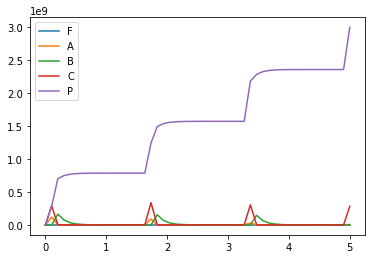

In [5]:
for species in ode_results[0]:
    if species == 'time': continue
    plt.plot(ode_results[0]['time'], ode_results[0][species], label=species)
plt.legend(loc='best')

In [6]:
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver
%time results = model.run()

CPU times: user 15.6 ms, sys: 156 ms, total: 172 ms
Wall time: 13min 38s


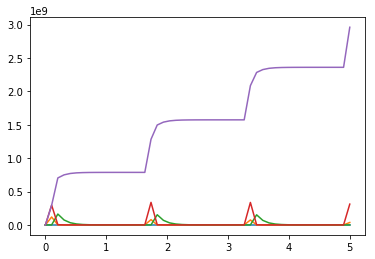

In [7]:
for species in results[0]:
    if species == 'time': continue
    plt.plot(results[0]['time'], results[0][species])

In [8]:
print(model.listOfReactions['reaction4'].propensity_function)
print(model.listOfReactions['reaction4'].ode_propensity_function)

k4*A*(A-1)/vol
k4*A*A
